In [273]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [274]:
df = pd.read_csv('malwares.csv')
df.head()

,appexception,apicall,codeinjection,dll-loaded,doc_summary,exploitcode,file,folder,heapspraying,hiddenproc,malicious-alert,mutex,network,process,regkey,thread,wmiquery,CheckRemoteDebuggerPresent,ClipboardFormatListener,ClipboardSequenceNumber,CLSIDFromString,CryptAcquireContext,EncryptMessage,EnumWindows,ExitProcess,FindWindowEx,FindWindow,GetClipboardData,GetComputerName,GetComputerNameEx,GetDesktopWindow,GetForegroundWindow,GetLocalTime,GetSystemDefaultLangID,GetSystemDirectory,GetSystemTime,GetTokenInformation,GetVersionEx,GetVolumeNameForVolumeMountPoint,IcmpSendEcho,IsDebuggerPresent,MessageBox,NtAdjustPrivilegesToken,RegisterRawInputDevices,SetClipboardData,SetClipboardViewer,SetProcessDEPPolicy,SetTimer,SetWindowsHookEx,ShellExecute,Sleep,SleepEx,StartService,SystemTimeToFileTime,xls,doc,exe,xlsx,zip,xlsm,docx,xlsb,pif,scr,altra_estensione,agent_tesla,carrotbat,icedid,asyncrat,ave_maria,emotet,formbook,gozi,lokibot,nanocore,netsky,remcos,qakbot,autoit
0,0,7,0,0,8,0,93,22,0,0,50,0,12,32,67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3,75,17,0,16,21,219,18,0,0,93,22,33,42,69,33,0,0,0,11,0,18,0,0,0,0,0,0,0,0,0,0,0,0,25,0,4,0,0,0,0,0,0,0,0,0,0,0,8,0,0,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,41,8,2,2,8,105,6,0,0,48,4,112,19,25,6,0,0,0,5,0,0,0,0,0,0,0,10,0,0,0,0,0,0,2,0,7,0,16,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,3,78,17,0,16,21,218,18,0,0,92,22,33,42,69,33,0,0,0,11,0,19,0,0,0,0,0,0,0,0,0,0,0,0,25,0,4,0,0,0,0,0,0,0,0,0,0,0,8,0,0,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2,243,5,0,6,0,342,5,0,0,60,31,0,15,78,0,5,0,0,0,29,3,0,0,0,0,4,0,2,8,0,0,0,0,20,0,8,0,8,0,0,0,2,0,0,0,0,2,8,0,27,121,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [275]:
# Display all columns
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 

df.nunique()

appexception                         12
apicall                             343
codeinjection                        60
dll-loaded                           15
doc_summary                          25
exploitcode                          31
file                                822
folder                               44
heapspraying                         12
hiddenproc                            2
malicious-alert                     112
mutex                                67
network                             232
process                             138
regkey                              233
thread                               38
wmiquery                             17
CheckRemoteDebuggerPresent            2
ClipboardFormatListener               4
ClipboardSequenceNumber              16
CLSIDFromString                      12
CryptAcquireContext                  34
EncryptMessage                        9
EnumWindows                           5
ExitProcess                           4


In [276]:
df.shape

(6811, 79)

In [277]:
df.describe().round()

,appexception,apicall,codeinjection,dll-loaded,doc_summary,exploitcode,file,folder,heapspraying,hiddenproc,malicious-alert,mutex,network,process,regkey,thread,wmiquery,CheckRemoteDebuggerPresent,ClipboardFormatListener,ClipboardSequenceNumber,CLSIDFromString,CryptAcquireContext,EncryptMessage,EnumWindows,ExitProcess,FindWindowEx,FindWindow,GetClipboardData,GetComputerName,GetComputerNameEx,GetDesktopWindow,GetForegroundWindow,GetLocalTime,GetSystemDefaultLangID,GetSystemDirectory,GetSystemTime,GetTokenInformation,GetVersionEx,GetVolumeNameForVolumeMountPoint,IcmpSendEcho,IsDebuggerPresent,MessageBox,NtAdjustPrivilegesToken,RegisterRawInputDevices,SetClipboardData,SetClipboardViewer,SetProcessDEPPolicy,SetTimer,SetWindowsHookEx,ShellExecute,Sleep,SleepEx,StartService,SystemTimeToFileTime,xls,doc,exe,xlsx,zip,xlsm,docx,xlsb,pif,scr,altra_estensione,agent_tesla,carrotbat,icedid,asyncrat,ave_maria,emotet,formbook,gozi,lokibot,nanocore,netsky,remcos,qakbot,autoit
count,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0,6811.0
mean,3.0,69.0,11.0,1.0,5.0,6.0,459.0,10.0,2.0,0.0,53.0,7.0,62.0,23.0,52.0,5.0,1.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,2.0,1.0,0.0,7.0,1.0,6.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,14.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,6.0,69.0,117.0,2.0,4.0,8.0,892.0,7.0,3.0,0.0,17.0,12.0,282.0,78.0,48.0,11.0,2.0,0.0,0.0,3.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0,4.0,2.0,3.0,1.0,8.0,4.0,4.0,10.0,2.0,5.0,0.0,8.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,17.0,33.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,19.0,0.0,0.0,2.0,0.0,77.0,4.0,0.0,0.0,44.0,0.0,4.0,7.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,50.0,5.0,0.0,6.0,8.0,242.0,8.0,0.0,0.0,52.0,3.0,10.0,14.0,53.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2.0,88.0,10.0,0.0,8.0,10.0,658.0,16.0,3.0,0.0,59.0,10.0,17.0,26.0,63.0,6.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,3.0,0.0,0.0,0.0,13.0,2.0,9.0,0.0,12.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,21.0,7.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
max,24.0,589.0,2960.0,51.0,26.0,353.0,7981.0,72.0,20.0,3.0,124.0,302.0,3409.0,2375.0,712.0,76.0,25.0,1.0,5.0,19.0,67.0,57.0,20.0,84.0,21.0,2.0,10.0,26.0,20.0,28.0,20.0,85.0,42.0,135.0,103.0,20.0,45.0,5.0,83.0,118.0,9.0,4.0,8.0,4.0,35.0,6.0,4.0,21.0,44.0,4.0,210.0,287.0,3.0,144.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [278]:
column_names = df.columns
feature_col = column_names[:65]
result_col = column_names[65:]
result_col

Index(['agent_tesla', 'carrotbat', 'icedid', 'asyncrat', 'ave_maria', 'emotet',
       'formbook', 'gozi', 'lokibot', 'nanocore', 'netsky', 'remcos', 'qakbot',
       'autoit'],
      dtype='object')

In [279]:
df[result_col].sum()

agent_tesla     990
carrotbat       242
icedid          123
asyncrat          6
ave_maria        31
emotet           53
formbook       2488
gozi             48
lokibot        2027
nanocore         54
netsky          157
remcos          149
qakbot          428
autoit           15
dtype: int64

In [280]:
df['result'] = (df[result_col] == 1).idxmax(axis=1)
df.head()

,appexception,apicall,codeinjection,dll-loaded,doc_summary,exploitcode,file,folder,heapspraying,hiddenproc,malicious-alert,mutex,network,process,regkey,thread,wmiquery,CheckRemoteDebuggerPresent,ClipboardFormatListener,ClipboardSequenceNumber,CLSIDFromString,CryptAcquireContext,EncryptMessage,EnumWindows,ExitProcess,FindWindowEx,FindWindow,GetClipboardData,GetComputerName,GetComputerNameEx,GetDesktopWindow,GetForegroundWindow,GetLocalTime,GetSystemDefaultLangID,GetSystemDirectory,GetSystemTime,GetTokenInformation,GetVersionEx,GetVolumeNameForVolumeMountPoint,IcmpSendEcho,IsDebuggerPresent,MessageBox,NtAdjustPrivilegesToken,RegisterRawInputDevices,SetClipboardData,SetClipboardViewer,SetProcessDEPPolicy,SetTimer,SetWindowsHookEx,ShellExecute,Sleep,SleepEx,StartService,SystemTimeToFileTime,xls,doc,exe,xlsx,zip,xlsm,docx,xlsb,pif,scr,altra_estensione,agent_tesla,carrotbat,icedid,asyncrat,ave_maria,emotet,formbook,gozi,lokibot,nanocore,netsky,remcos,qakbot,autoit,result
0,0,7,0,0,8,0,93,22,0,0,50,0,12,32,67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,qakbot
1,3,75,17,0,16,21,219,18,0,0,93,22,33,42,69,33,0,0,0,11,0,18,0,0,0,0,0,0,0,0,0,0,0,0,25,0,4,0,0,0,0,0,0,0,0,0,0,0,8,0,0,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,formbook
2,0,41,8,2,2,8,105,6,0,0,48,4,112,19,25,6,0,0,0,5,0,0,0,0,0,0,0,10,0,0,0,0,0,0,2,0,7,0,16,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,formbook
3,3,78,17,0,16,21,218,18,0,0,92,22,33,42,69,33,0,0,0,11,0,19,0,0,0,0,0,0,0,0,0,0,0,0,25,0,4,0,0,0,0,0,0,0,0,0,0,0,8,0,0,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,formbook
4,2,243,5,0,6,0,342,5,0,0,60,31,0,15,78,0,5,0,0,0,29,3,0,0,0,0,4,0,2,8,0,0,0,0,20,0,8,0,8,0,0,0,2,0,0,0,0,2,8,0,27,121,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,agent_tesla


In [281]:
plot_features = feature_col[:4] #+ [['result']]
plot_features = plot_features.insert(0,'result')
#sns.pairplot(df[plot_features], hue='result')
#df.head()


In [282]:
plot_features = feature_col[4:8]
plot_features = plot_features.insert(0,'result')
#sns.pairplot(df[plot_features], hue='result')

In [283]:
plot_features = feature_col[8:12]
plot_features = plot_features.insert(0,'result')
#sns.pairplot(df[plot_features], hue='result')

In [284]:
plot_features = feature_col[12:24]
plot_features = plot_features.insert(0,'result')
#sns.pairplot(df[plot_features], hue='result')

In [285]:
from sklearn.preprocessing import StandardScaler

dicts = df[feature_col].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X = dv.fit_transform(dicts)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [286]:
from sklearn.decomposition import PCA

# Loading the PCA object
pca = PCA(n_components = 2) # Here we choose the number of components that we will keep.
X_pca = pca.fit_transform(X_scaled) #df[feature_col])
df_pca = pd.DataFrame(X_pca, columns = ['principal_component_1','principal_component_2',])

In [287]:
new_df = pd.concat([df_pca, df['result']], axis=1)
colour_values = {
    'agent_tesla': '#FF5733', 
    'carrotbat': '#33FF57', 
    'icedid': '#5733FF',
    'asyncrat': '#FF33A6', 
    'ave_maria': '#33A6FF', 
    'emotet': '#A6FF33',       
    'formbook': '#FF33E8', 
    'gozi': '#33E8FF', 
    'lokibot': '#E8FF33', 
    'nanocore': '#FF3364', 
    'netsky': '#3364FF', 
    'remcos': '#64FF33', 
    'qakbot': '#FF334A',
    'autoit': '#334AFF'
}
new_df.result = new_df.result.map(colour_values)

Text(0.5, 1.0, 'PCA decomposition')

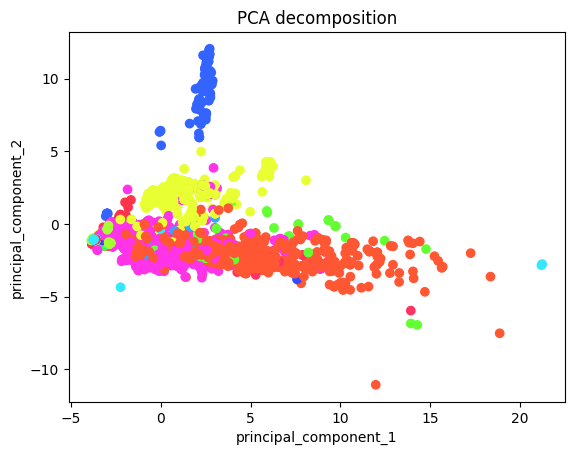

In [288]:
plt.scatter(new_df['principal_component_1'],new_df['principal_component_2'], color = new_df['result'])
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2')
plt.title('PCA decomposition')

In [289]:
pca_3 = PCA(n_components = 5).fit(X_scaled)#df[feature_col])
X_t = pca_3.transform(X_scaled)#df[feature_col])
df_pca_3 = pd.DataFrame(X_t,columns = ['principal_component_1','principal_component_2','principal_component_3','principal_component_4','principal_component_5'])

In [290]:
new_df = pd.concat([df_pca_3, df['result']], axis=1)
new_df.head()



,principal_component_1,principal_component_2,principal_component_3,principal_component_4,principal_component_5,result
0,-2.394942,0.101582,0.732386,-2.176552,0.291345,qakbot
1,2.217475,-1.875446,1.385159,1.273893,3.837168,formbook
2,-1.942934,-1.043421,1.067133,1.589026,0.002561,formbook
3,2.284362,-1.906057,1.367430,1.252545,3.831248,formbook
4,7.817346,-4.087855,0.523415,-2.503401,-3.954736,agent_tesla


In [291]:

import plotly.express as px

fig = px.scatter_3d(new_df, x = 'principal_component_1', y = 'principal_component_2', z = 'principal_component_3', color='result')#.update_traces(marker = dict(color = "#C00000"))
fig.show()
#new_df.head()

In [292]:
corr_tab = {}
for attack in result_col:
    corr_tab[attack] = df[feature_col].corrwith(df[attack]).abs().sort_values(ascending=False)[:10]

corr_tab


c:\Users\Maria\Documents\ML\Italian ML\Test\SemeionTechCollabTest\.venv\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

c:\Users\Maria\Documents\ML\Italian ML\Test\SemeionTechCollabTest\.venv\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



{'agent_tesla': wmiquery                   0.893017
 GetComputerNameEx          0.787264
 SleepEx                    0.742918
 apicall                    0.623355
 NtAdjustPrivilegesToken    0.538627
 exe                        0.502108
 SetWindowsHookEx           0.474471
 StartService               0.414043
 GetForegroundWindow        0.409185
 GetSystemDirectory         0.361053
 dtype: float64,
 'carrotbat': altra_estensione       0.367451
 doc_summary            0.366425
 MessageBox             0.363038
 ExitProcess            0.303451
 GetTokenInformation    0.230700
 apicall                0.177961
 folder                 0.169598
 regkey                 0.163588
 GetComputerName        0.162284
 xlsx                   0.158428
 dtype: float64,
 'icedid': altra_estensione       0.254251
 malicious-alert        0.187571
 doc_summary            0.181784
 folder                 0.167173
 GetTokenInformation    0.163002
 regkey                 0.130898
 apicall                0.1280

In [293]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

df_train    = df_train.reset_index(drop=True)
df_val      = df_val.reset_index(drop=True)
df_test     = df_test.reset_index(drop=True)

y_train     = df_train[result_col]
y_test      = df_test[result_col]
y_val       = df_val[result_col]

df_train    = df_train[feature_col]
df_val      = df_val[feature_col]
df_test     = df_test[feature_col]

In [294]:
df_train.head().T

,0,1,2,3,4
appexception,0,0,0,2,0
apicall,188,38,3,144,3
codeinjection,0,11,0,5,0
dll-loaded,0,0,0,0,0
doc_summary,3,2,8,6,8
exploitcode,10,8,0,0,0
file,97,146,156,289,0
folder,4,6,22,4,0
heapspraying,0,7,0,0,0
hiddenproc,0,0,0,0,0


In [295]:
def multiclass_accuracy (y_true, y_pred, treshold):
    sum = 0
    prediction = 0
    for yt, yp in zip(y_true, y_pred):
        equal = 0
        for t, p in zip(yt, yp):
           if p > treshold:
                prediction = 1
           else:
                prediction = 0
           
           if t != prediction:
                equal = 1
        if equal == 0:
            sum += 1
    return sum/y_true.__len__()

In [296]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

test_dicts = df_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)

y_val_np = np.array(y_val)

scores = []

for d in range(8,25):
    dt = DecisionTreeClassifier(max_depth=d, random_state=11)#depth)
    dt.fit(X_train, y_train)

    y_pred = np.array( dt.predict_proba(X_val))[:,:,1]

    ra_score = roc_auc_score(y_val, y_pred.T)
    acc_score = multiclass_accuracy(y_val_np, y_pred.T, 0.6)

    scores.append((d, ra_score, acc_score))

scores

[(8, 0.962098940083116, 0.933920704845815),
 (9, 0.9721232595750086, 0.9441997063142438),
 (10, 0.9652755711130141, 0.9508076358296622),
 (11, 0.971495986718716, 0.9574155653450808),
 (12, 0.9687848825023844, 0.9618208516886931),
 (13, 0.9731578342830332, 0.9632892804698973),
 (14, 0.9734093893926402, 0.9684287812041116),
 (15, 0.9666416658849528, 0.9684287812041116),
 (16, 0.9702521836837856, 0.972834067547724),
 (17, 0.9724206147847027, 0.9720998531571219),
 (18, 0.9688197434035456, 0.9743024963289281),
 (19, 0.9690340147049238, 0.9772393538913363),
 (20, 0.9681465894329703, 0.9779735682819384),
 (21, 0.9713043104583995, 0.9779735682819384),
 (22, 0.9683368593160713, 0.9743024963289281),
 (23, 0.968633101225831, 0.9765051395007343),
 (24, 0.968633101225831, 0.9765051395007343)]

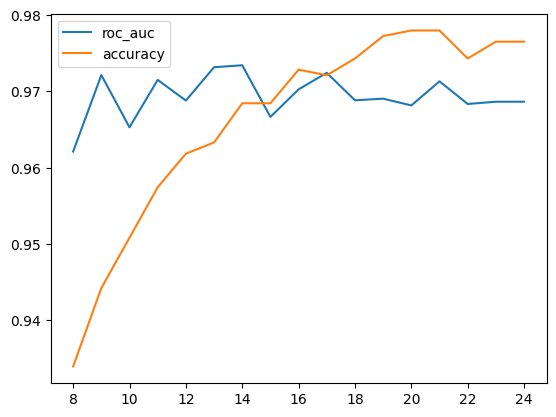

In [297]:
columns = ['depth', 'roc_auc_score', 'accuracy']
df_scores = pd.DataFrame(scores, columns=columns)

plt.plot(df_scores.depth, df_scores['roc_auc_score'], label='roc_auc')
plt.plot(df_scores.depth, df_scores['accuracy'], label='accuracy')
plt.legend()

In [298]:
roc_auc_ovr = {}
total_roc_auc = 0
for i in range(0, result_col.__len__()):
    attack = result_col[i]
    roc_auc_val =  roc_auc_score(y_val[attack], y_pred[i,:].T)
    roc_auc_ovr[attack] = roc_auc_val
    total_roc_auc = total_roc_auc + roc_auc_val

print(total_roc_auc / result_col.__len__())

roc_auc_ovr

0.968633101225831


{'agent_tesla': 0.9933253670194605,
 'carrotbat': 0.9893617021276595,
 'icedid': 0.999627143922446,
 'asyncrat': 0.75,
 'ave_maria': 0.9992641648270788,
 'emotet': 0.9992576095025983,
 'formbook': 0.9828968194369029,
 'gozi': 0.9642857142857143,
 'lokibot': 0.9899067852636957,
 'nanocore': 0.9492603550295858,
 'netsky': 1.0,
 'remcos': 0.9440699126092384,
 'qakbot': 0.9996078431372549,
 'autoit': 1.0}

In [299]:
scores = []

for d in [5, 10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1,
                                    n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = np.array( rf.predict_proba(X_val))[:,:,1]

        ra_score = roc_auc_score(y_val, y_pred.T)
        acc_score = multiclass_accuracy(y_val_np, y_pred.T, 0.6)

        scores.append((d, n, ra_score, acc_score))

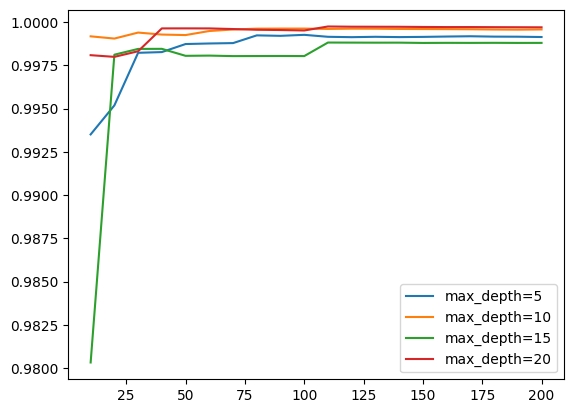

In [300]:
columns = ['max_depth', 'n_estimators', 'auc', 'accuracy']
df_scores = pd.DataFrame(scores, columns=columns)

for d in [5, 10, 15, 20]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()



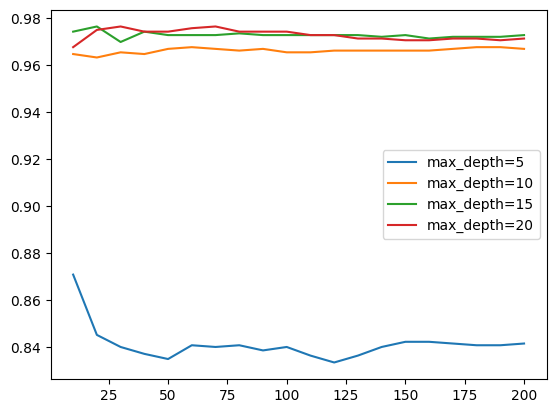

In [301]:
for d in [5, 10, 15, 20]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.accuracy,
             label='max_depth=%d' % d)

plt.legend()

In [302]:
scores = []

for d in range(16,24):
    n = 50
    rf = RandomForestClassifier(n_estimators=n,
                                max_depth=d,
                                random_state=1,
                                n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = np.array( rf.predict_proba(X_val))[:,:,1]

    ra_score = roc_auc_score(y_val, y_pred.T)
    acc_score = multiclass_accuracy(y_val_np, y_pred.T, 0.6)

    scores.append((d, n, ra_score, acc_score))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


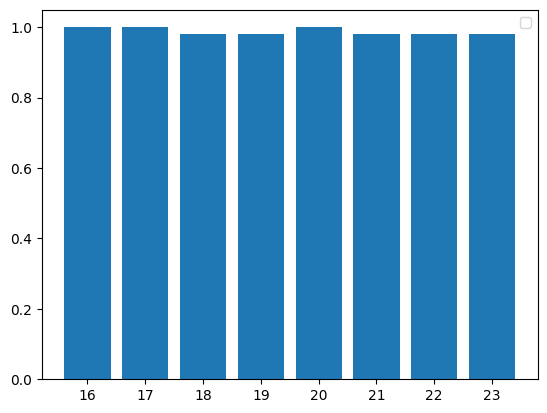

In [303]:
columns = ['max_depth', 'n_estimators', 'auc', 'accuracy']
df_scores = pd.DataFrame(scores, columns=columns)

plt.bar(df_scores.max_depth, df_scores.auc )
#plt.plot(df_subset.max_depth, df_subset.accuracy,
 #            label='accuracy' )

plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


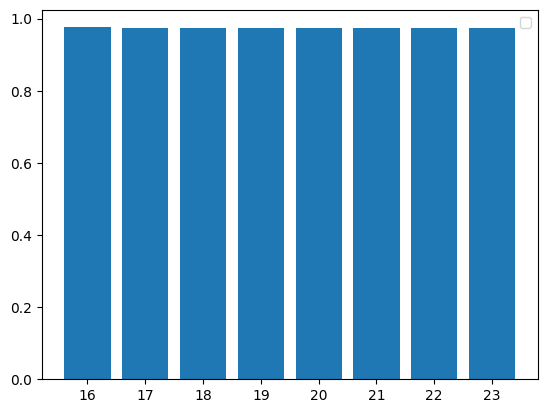

In [304]:
columns = ['max_depth', 'n_estimators', 'auc', 'accuracy']
df_scores = pd.DataFrame(scores, columns=columns)

plt.bar(df_scores.max_depth, df_scores.accuracy )

plt.legend()

In [305]:
df_scores

,max_depth,n_estimators,auc,accuracy
0,16,50,0.999623,0.975771
1,17,50,0.999712,0.973568
2,18,50,0.981840,0.973568
3,19,50,0.981848,0.974302
4,20,50,0.999629,0.974302
5,21,50,0.981818,0.974302
6,22,50,0.981817,0.972834
7,23,50,0.981819,0.973568


In [306]:
#The best model
rf = RandomForestClassifier(n_estimators=50,
                            max_depth=16,
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = np.array( rf.predict_proba(X_val))[:,:,1]

ra_score = roc_auc_score(y_val, y_pred.T)
acc_score = multiclass_accuracy(y_val_np, y_pred.T, 0.45)
(ra_score, acc_score)

(0.9996229784731596, 0.9845814977973568)

In [307]:
#On test dataset
y_pred = np.array( rf.predict_proba(X_test))[:,:,1]

ra_score = roc_auc_score(y_test, y_pred.T)
y_test_np = np.array(y_test)
acc_score = multiclass_accuracy(y_test_np, y_pred.T, 0.45)
(ra_score, acc_score)

(0.9698578519986328, 0.9801907556859868)